Solución Laboratorio 4

Christopher Bolaños Murillo B31044
Mónica Chaves Calvo B82123

1) Se cambian los valores de la varianza y la media para vaC.
2) Se crean las nuevas variableas aleatorias vaO y vaT con sus respectivos valores.
3) Luego se crean las constantes de O y Th con el valor medio dentro del rango respectivo.
4) Se editan las ecuaciones de E[X(t)] y Rxx con los valores dados en la práctica.
5) :)

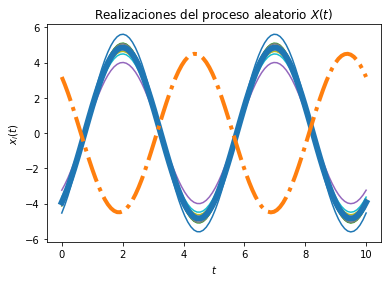

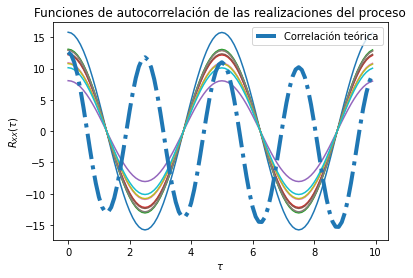

In [2]:
# Base para la solución del Laboratorio 4

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaC = stats.norm(5, np.sqrt(0.2))
vaO = stats.uniform(2*np.pi*(59.1),2*np.pi*(60.1))
vaT = stats.uniform(0, np.pi/2)



O = 2*np.pi*(59.6)
Th = np.pi/4

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos


# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	C = vaC.rvs()
    #th = vaT.rvs()
    
	x_t = C * np.cos(O*t + O)
	X_t[i,:] = x_t
	plt.plot(t, x_t)


# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi * (np.cos(O*t) - np.sin(O*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(O*t+Th)*np.cos(O*(t+taus)+Th)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()